### Citations:
1. Dr.DeBary Nov 28 Lecture
2. Dr. DeBary Nov 21 Lecture

# Background 
In this project I will be performing a clustering task that makes comparisons between a list of colleges. The comparisons are between features that give vital information about each college. The purpose of this task is to organize the list of schools based on their rankings to help guide future students to the best school for them.

# Objective
To identify different types of engineering colleges, and group them in clusters based on their ranks and
information.

# Data Description 
The data contains a survey of 26 engineering colleges. This survey has summarized the data into a rating scale of
1-5 for different factors. The rating scale is as follows:
1 - Very low, 
2 - Low, 
3 - Medium, 
4 - High, 
5 - Very high.
## Feaatures
• SR_NO: Serial Number

• Engg_College: 26 Engineering colleges with A to Z as their names

• Teaching: The rating for the quality of teaching at each engineering college (1-5)

• Fees: The rating of the fees at each engineering college (1-5)

• Placements: The rating of the job placement after the student graduates from each engineering college (1-5)

• Internship: The rating of the student Internships at each engineering college (1-5)

• Infrastructure: The rating of the infrastructure of each engineering college (1-5)

#Importing Libraries

In [ ]:
!pip install nb_black

In [3]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import io

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

<IPython.core.display.Javascript object>

# Loading Data

In [4]:
from google.colab import files 
uploaded = files.upload()

Saving colleges_dataset.xlsx to colleges_dataset.xlsx


<IPython.core.display.Javascript object>

In [5]:
colleges_data = pd.read_excel(io.BytesIO(uploaded['colleges_dataset.xlsx']))


<IPython.core.display.Javascript object>

In [6]:
data = colleges_data.copy()

<IPython.core.display.Javascript object>

#Basic Data Exploration 

In [7]:
data.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5


<IPython.core.display.Javascript object>

In [8]:
data.shape

(26, 7)

<IPython.core.display.Javascript object>

#### Observations: 
The dataset has 26 rows and 7 columns

In [9]:
#Dimensions 
data.ndim

2

<IPython.core.display.Javascript object>

#### Observations: 
* The dataset is 2-D. If the dataset has too many dimensions(greater than 2), you must reduce the dimensionality of the data. 

In [10]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
18,19,S,3,5,4,3,3
13,14,N,3,5,3,3,4
17,18,R,3,4,4,3,3
3,4,D,5,4,5,4,4
22,23,W,2,5,1,1,1
10,11,K,3,4,3,4,5
19,20,T,3,5,3,2,3
20,21,U,2,2,2,2,1
4,5,E,2,5,2,2,5
2,3,C,4,5,5,4,5


<IPython.core.display.Javascript object>

In [11]:
#Checking for missing values 
data.isnull().sum()

SR_NO             0
Engg_College      0
Teaching          0
Fees              0
Placements        0
Internship        0
Infrastructure    0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
There are no missing values. 

In [12]:
#Checking for duplicate values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

####Observations: 
There are no duplicate values in the dataset. 

In [13]:
#Viewing the data types and the structure of the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SR_NO           26 non-null     int64 
 1   Engg_College    26 non-null     object
 2   Teaching        26 non-null     int64 
 3   Fees            26 non-null     int64 
 4   Placements      26 non-null     int64 
 5   Internship      26 non-null     int64 
 6   Infrastructure  26 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


<IPython.core.display.Javascript object>

#### Observations: 
All of the features are numerical except for name of the colleges. 

# Summary of numerical features 

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SR_NO,26.0,13.500000,7.648529,1.0,7.25,13.5,19.75,26.0
Teaching,26.0,2.807692,1.132051,1.0,2.00,3.0,3.00,5.0
Fees,26.0,3.576923,1.331858,1.0,2.25,4.0,5.00,5.0
Placements,26.0,2.884615,1.531716,1.0,1.25,3.0,4.00,5.0
Internship,26.0,2.769231,1.242826,1.0,2.00,2.0,4.00,5.0
Infrastructure,26.0,3.384615,1.298520,1.0,3.00,3.0,4.75,5.0


<IPython.core.display.Javascript object>

#### Observations:
* Each feature has an average of about 3, except for fees. 
* Fees has an average ranking of 4. 
* 50% of the dataset gave a 5 rating for fees. 
* We do not need the SR_NO column.
* Teaching is the only feature that may have some outliers

In [15]:
#dropping the SR_NO column
data.drop('SR_NO', axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [17]:
data.head()

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,A,5,2,5,5,3
1,B,4,2,5,5,3
2,C,4,5,5,4,5
3,D,5,4,5,4,4
4,E,2,5,2,2,5


<IPython.core.display.Javascript object>

# Data Preprocessing 

In [18]:
#1st, Store all numerical features to a variable 
num_col = data.select_dtypes(include=np.number).columns.tolist()
num_col

['Teaching', 'Fees', 'Placements', 'Internship', 'Infrastructure']

<IPython.core.display.Javascript object>

#### Observations:
Includes all features except the college name

In [19]:
# 2nd, scaling is almost needed in any clustering project before performing clustering
scaler = StandardScaler()
subset = data[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [20]:
# 3rd, creating a dataframe of the scaled columns
subset_scaled_data = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

# Model Building 

## K-means Clustering

1. Finding the best value for K
2. Running the model using the best value of K
3. Creating cluster profiling  

###  Elbow Method for finding the best value for K

In [21]:
clusters = range(1, 9)
# creating 8 clusters
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_data)
    prediction = model.predict(subset_scaled_data)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_data, model.cluster_centers_, "euclidean"), axis=1)
        )  # cdist calculate the minimum distance using euclidena measure between data points and centroid in
        # every cluster and with the centroid of the neighboring cluster
        / subset_scaled_data.shape[0]
    )

    # distorion in k-means is defined as the sum of the squared distances between
    # each data point and the centroid within a cluster. The k-means method tries to minimize the distorion.
    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 1 	Average Distortion: 2.087990295998642
Number of Clusters: 2 	Average Distortion: 1.6030760049686552
Number of Clusters: 3 	Average Distortion: 1.3542868697697457
Number of Clusters: 4 	Average Distortion: 1.1658645562214658
Number of Clusters: 5 	Average Distortion: 1.0463920035203713
Number of Clusters: 6 	Average Distortion: 0.9313789989995135
Number of Clusters: 7 	Average Distortion: 0.8210830918162462
Number of Clusters: 8 	Average Distortion: 0.7161563518185236


<IPython.core.display.Javascript object>

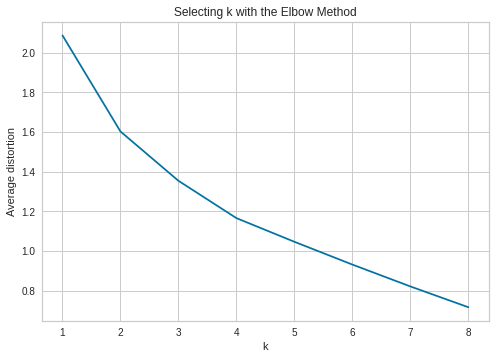

<IPython.core.display.Javascript object>

In [22]:
# plotting the elbow method: a way of choosing a value for k = number of clusters
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

####Observations: 
* The best value for k seems to be between 4 and 5. 

### Using the KElbow Visualizer to find the best value for K 
* The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for . If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.
citation: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html 

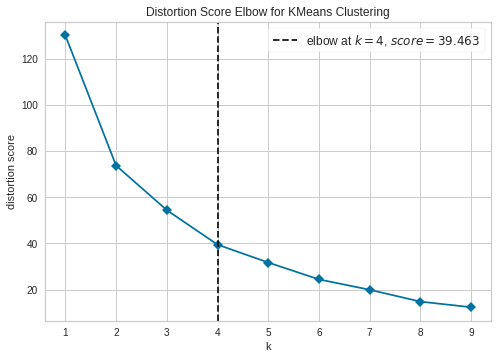

<IPython.core.display.Javascript object>

In [23]:
# let's check out the KElbow Visualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 10), timings=False)
visualizer.fit(subset_scaled_data)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

* Appropriate value for k seems to be 4 based on the KElbow KMean Clustering plot.  

### Checking the silhouette scores to find the best value for K 
* The Silhouette Coefficient is used when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model. The score is computed by averaging the silhouette coefficient for each sample, computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.
citation: https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

For n_clusters = 2, the silhouette score is 0.3347415593639785)
For n_clusters = 3, the silhouette score is 0.2896589939792401)
For n_clusters = 4, the silhouette score is 0.33463113210907935)
For n_clusters = 5, the silhouette score is 0.3581038185380645)
For n_clusters = 6, the silhouette score is 0.3751606440274479)
For n_clusters = 7, the silhouette score is 0.3661442615367182)
For n_clusters = 8, the silhouette score is 0.3975512934421172)
For n_clusters = 9, the silhouette score is 0.39102713851068926)


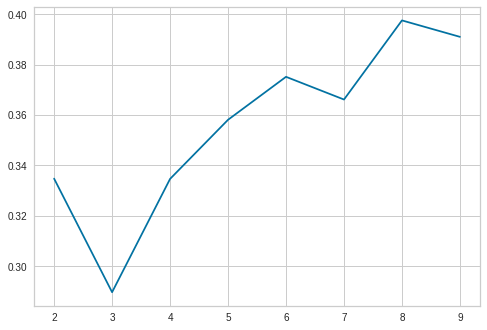

<IPython.core.display.Javascript object>

In [24]:
# let's check the silhouette visualizer out
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_data))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_data, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

#### Observations: 
The silhouette score for cluster size 8 is the highest. 

## KMean = 3

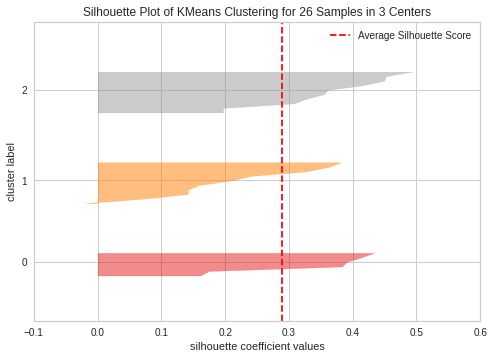

<IPython.core.display.Javascript object>

In [25]:
# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=1)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(subset_scaled_data)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

## KMean = 4

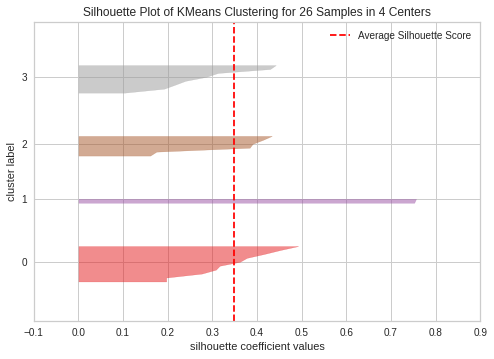

<IPython.core.display.Javascript object>

In [26]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

## KMean = 5

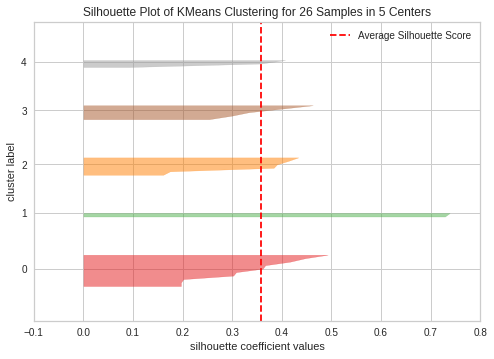

<IPython.core.display.Javascript object>

In [27]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

## Running the model using the best value of K

In [28]:
# let's take 5 as number of clusters
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(subset_scaled_data)

KMeans(n_clusters=5, random_state=0)

<IPython.core.display.Javascript object>

In [29]:
# adding kmeans cluster labels to the original and scaled dataframes

data["K_means_segments"] = kmeans.labels_
subset_scaled_data["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [30]:
# adding kmeans cluster labels to the original dataframe
cluster_profile = data.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [31]:
cluster_profile["count_in_each_segments"] = (
    data.groupby("K_means_segments")["Placements"].count().values
)

<IPython.core.display.Javascript object>

In [32]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Teaching,Fees,Placements,Internship,Infrastructure,count_in_each_segments
K_means_segments,,,,,,
0,4.000000,3.625000,4.375000,4.375000,4.250000,8
1,1.333333,4.333333,1.000000,1.333333,1.666667,3
2,2.750000,4.625000,3.375000,2.500000,3.500000,8
3,1.000000,1.000000,1.000000,1.500000,5.000000,2
4,2.600000,2.400000,1.600000,2.000000,2.200000,5


<IPython.core.display.Javascript object>

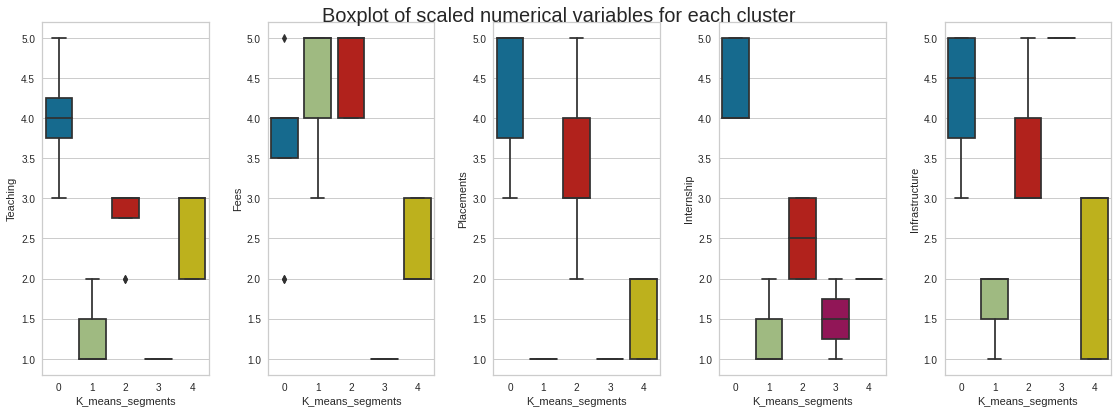

<IPython.core.display.Javascript object>

In [33]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=data[num_col[counter]],
        x=data["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

# Insights for each cluster

- **Cluster 0**:
    - This cluster contains teaching rating of 3 and above.
    - All the ratings for student's internship were between 4-5. 
    - The median rating for infrastructure is 4.5 which indicates students are very satisfied with the infrastructure of their campuses.   
- **Cluster 1**:
    - Fees are high in this cluster.
    - The highest teacher rating in 2. 
    - 100% of the students rating infrastructure between 1-2. Students were very dissatisfied with the infrastructure. 
    - Students in this cluster reported very low placement ratings.
    - 50% of students rated internships between 1-1.5.
    
- **Cluster 2**:
    - Students rated their teachers pretty neutral in this cluster.
    - Students reported fees between high and very high.
    - 50% of the students rated job placement between 3-4.
    - 25% of students rated infrastructure between 4 and 5. 


- **Cluster 3**:
    - The students in this cluster were not at all satisfied with teacher instruction.
    - Only 2 students are in this cluster.
    - Both students reported very low fees, and job placement.
    - The maximum internship rating is 2. 
    - Both students were very satisfied with the infrastructure of the schools. 
- **Cluster 4**:
    - The students in this cluster rated teachers and fees between 2-3. 
    - Students in this cluster reported very low to low job placement. 
    - All the students in this cluster rated their internship as 2. 
    - Students rated infrastructure between 1-3. 


# Conclusion

- Cluster 0 consist of students who are generally more satisfied with their institution. 
- Cluster 0 and 2 had the most sutdents. 
- The schools the students in Cluster 0 attend should have a high rank, and will attract most future students. 
- Half the students rated teachers above 4 and the other half rated teachers between 3-4 in Cluster 0. 
- Schools should look at how they are rated and attempt to improve the areas students rated them poorly on. 